# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## data slicing, variables, etc

In [112]:
##first two systolic and diastolic only slice
columnsList = ['BPXSY1',
               'BPXDI1',
               'BPXSY2',
               'BPXDI2',
               'RIAGENDR',
               'RIDRETH1',
               'RIDAGEYR',
               'DMDEDUC2',
               'BMXBMI',
               'HIQ210']
sysDiaSlice = da.loc[:,columnsList].dropna()
columnRenameDict = {'BPXSY1': 'systolic1', 
                    'BPXSY2': 'systolic2',
                    'BPXDI1': 'diastolic1',
                    'BPXDI2': 'diastolic2',
                    'RIAGENDR': 'gender',
                    'RIDRETH1': 'ethnicity',
                    'RIDAGEYR': 'age',
                    'DMDEDUC2': 'education',
                    'BMXBMI':'bmi',
                    'HIQ210': 'insurance'}
sysDiaSlice =sysDiaSlice.rename(columns=columnRenameDict)

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


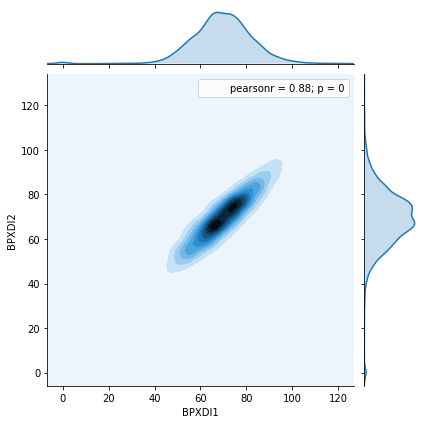

In [113]:
# enter your code here
sns.jointplot(x= da['BPXDI1'], y = da['BPXDI2'], data = da, kind = 'kde').annotate(stats.pearsonr)

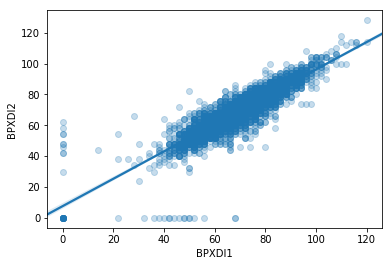

In [114]:
sns.regplot(x= da['BPXDI1'], y = da['BPXDI2'], data = da, scatter_kws = {'alpha': 0.25})

In [115]:
sysDiaCorrelationMatrix = sysDiaSlice.loc[:,['systolic1','systolic2','diastolic1','diastolic2']].corr()
print(sysDiaCorrelationMatrix)

            systolic1  systolic2  diastolic1  diastolic2
systolic1    1.000000   0.961425    0.268151    0.224027
systolic2    0.961425   1.000000    0.284236    0.249233
diastolic1   0.268151   0.284236    1.000000    0.883348
diastolic2   0.224027   0.249233    0.883348    1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

systolic1 is more correlated to 

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

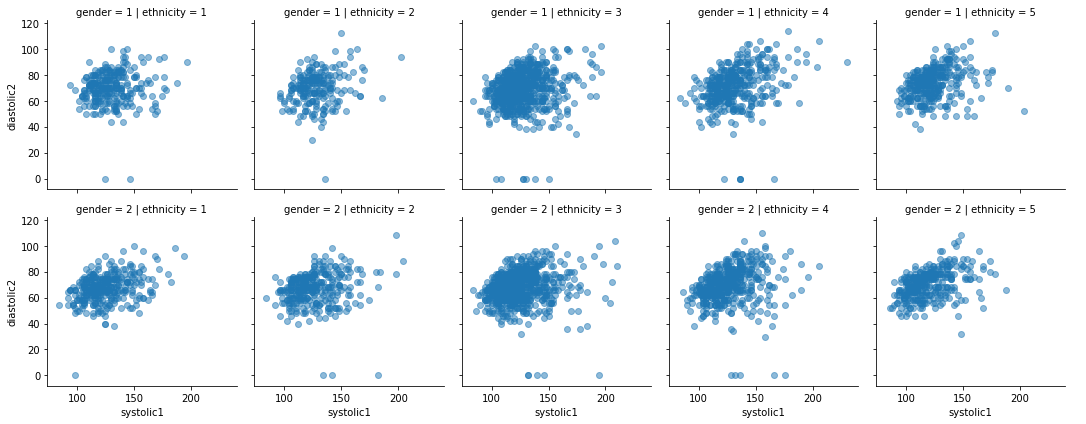

In [116]:
# insert your code here
FacetPlot = sns.FacetGrid(sysDiaSlice,row='gender',col='ethnicity')
FacetPlot = FacetPlot.map(plt.scatter, 'systolic1', 'diastolic2', alpha = 0.5).add_legend()


__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

there seems to be more correlation in gender 2 and ethnicity 2 as well as in ethicity 4 but for the most part they are not strongly correlated

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [117]:
# insert your code here
#converting education level to strings
sysDiaSlice['education'] = sysDiaSlice.education.replace({
    1:'lessthan9th',
    2:'9th-11th',
    3:'highschool',
    4:'someCollege',
    5:'collegegrad',
    6:'refused',
    9:'dontknow'
})

sysDiaSlice = sysDiaSlice.loc[~sysDiaSlice.education.isin(['refused','dontknow']), :]

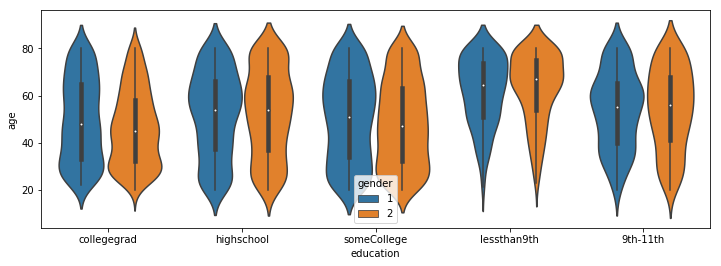

In [118]:
da = sysDiaSlice
plt.figure(figsize=(12, 4))
sns.violinplot('education', 'age', hue = 'gender', data = da )

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

only small differences between genders, it seems apparent though that there is some right skewness in the college grad demo in the female category.  this is offset by the less than 9th demo for females with a left skew

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

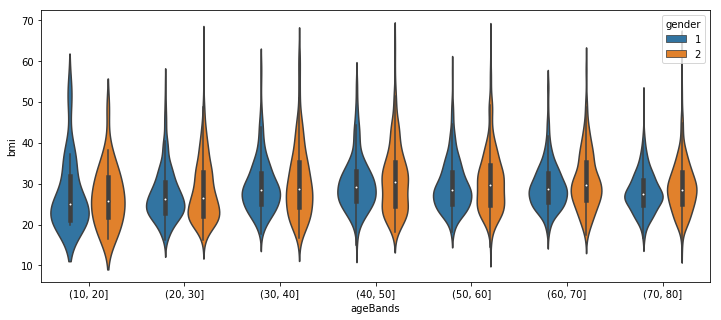

In [119]:
# insert your code here
da['ageBands'] = pd.cut(da.age,[10,20,30,40,50,60,70,80])
plt.figure(figsize=(12,5))
sns.violinplot('ageBands','bmi', hue='gender', data=da)

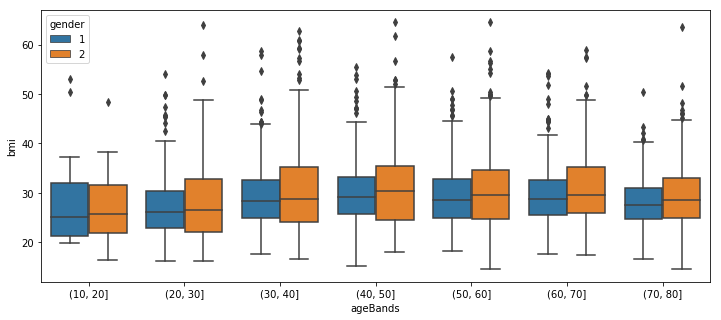

In [120]:
plt.figure(figsize=(12,5))
sns.boxplot('ageBands','bmi', hue='gender', data=da )

__Q5a.__ Comment on the trends in BMI across the demographic groups.

median bmi is higher across most demographics for women

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [126]:
# insert your code here
x = pd.crosstab(da.ethnicity, da.insurance)
x.apply(lambda y:y/y.sum(), axis=1)

insurance,1.0,2.0,9.0
ethnicity,,,
1,0.137288,0.859322,0.003390
2,0.134981,0.865019,0.000000
3,0.067639,0.931698,0.000663
4,0.110122,0.888765,0.001112
5,0.086310,0.912202,0.001488


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

ethnic group 3